Open audio file path:  spanish9.wav
1315.0


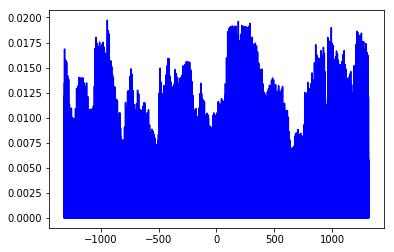

In [132]:
#https://medium.com/@anht_59851/tone-frequency-detection-from-an-audio-file-by-python-44d673f2e26b

from numpy import array, diff, where, split
from scipy import arange
import soundfile
import numpy, scipy
import pylab
import copy
import matplotlib
import statistics
matplotlib.use('tkagg')

#file_path = 'afrikaans1.wav'
file_path = 'spanish9.wav'
#file_path = 'test_audio_1000.wav'
print('Open audio file path: ', file_path)

print(get_max_freq(file_path))

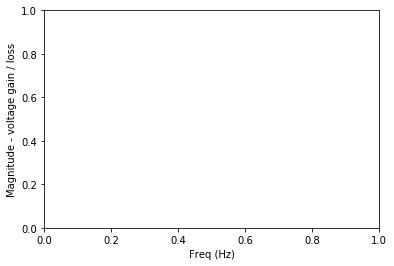

In [131]:
#Frequency bins, this is the list of frequencies that we can detect
#by sample rate 8kHz (follow the Nyquist-Shannon sampling theorem)
#SO for the sample rate 8kHz, the maximum frequency can be detect
# is 4kHz

def get_max_freq(file_path):
    audio_samples, sample_rate = soundfile.read(file_path, dtype='int16')
    number_samples = len(audio_samples)
    #print('Audio Samples: ', audio_samples)
    #print('Number of Sample: ', number_samples)
    #print('Sample Rate: ', sample_rate)

    #duration of the audio file
    duration = round(number_samples/sample_rate, 2)
    #print('Audio Duration: {0}s'.format(duration))

    #List of possible frequencies_bins
    freq_bins = arange(number_samples//2) * sample_rate/number_samples
    #print('Frequency bins: ', freq_bins)

    #(Fast Fourier transform algorithm) FFT calculation
    fft_data = scipy.fft(audio_samples)
    #print('FFT Length: ', len(fft_data))
    #print('FFT data: ', fft_data)

    freq_bins = freq_bins[range(number_samples//2)]
    normalization_data = fft_data/number_samples
    magnitude_values = normalization_data[range(len(fft_data)//2)]
    magnitude_values = numpy.abs(magnitude_values)

    x_axis = freq_bins
    y_axis = magnitude_values
    pylab.plot(x_axis, y_axis, color='blue')

    return numpy.round(numpy.amax(freq_bins))

    #indices = findPeak(magnitude_values = magnitude_values, noise_level = 200)
    #frequencies = extractFrequency(indices=indices)
    #print("frequencies: ", frequencies)


#graph the Frequency
pylab.xlabel('Freq (Hz)')
pylab.ylabel('Magnitude - voltage gain / loss')
pylab.show()

